In [8]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import researchpy as rp
import pandas as pd
from scipy.stats import spearmanr
import pingouin as pg

In [11]:
df = pd.read_csv('/kaggle/input/lung-cancer-survey-data/lung cancer survey.csv')

# Data Engineering with Python: Tools and Techniques
# # Overview
Researchpy is a Python package designed to simplify statistical analysis, making it accessible to non-statisticians. It is particularly useful for generating descriptive statistics, contingency tables, and conducting hypothesis tests, which are often part of the exploratory data analysis (EDA) phase in data engineering.

# # Key Features
* Descriptive Statistics: Quickly generate summaries for numerical and categorical data.
* Cross-tabulations: Create contingency tables with ease.
* Hypothesis Testing: Perform t-tests, chi-square tests, and more without the complexity of raw statistical libraries.

# # Use Cases in Data Engineering
* Data Quality Checks: Analyze datasets to ensure they meet expected statistical properties.
* Exploratory Data Analysis (EDA): Facilitate initial data exploration to understand distributions, relationships, and potential issues.

In [14]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


# Spearman's Rank Correlation
# # Overview
Spearman's rank correlation is a non-parametric measure of rank correlation . It assesses how well the relationship between two variables can be described using a monotonic function.

# # Key Features
* Non-parametric: Does not assume a normal distribution of the data.
* Handles Ordinal Data: Ideal for ordinal variables or non-linear relationships.
* Correlation Coefficient: The output is a value between -1 and 1, where 1 indicates a perfect positive monotonic relationship, -1 indicates a perfect negative monotonic relationship, and 0 indicates no correlation.

# # Use Cases in Data Engineering
* Feature Selection: Identify monotonic relationships between features and target variables.
* Kaggle Competitions: Quickly assess the strength and direction of relationships between variables, aiding in feature engineering.
* Data Quality Checks: Validate expected relationships between variables in datasets.

In [17]:
pearson_corr = pg.corr(x=df['AGE'], y=df['SMOKING'], method='pearson')
print('Pearson correlation between Age and Smoking:', pearson_corr)

Pearson correlation between Age and Smoking:            n         r          CI95%     p-val   BF10     power
pearson  309 -0.084475  [-0.19, 0.03]  0.138458  0.212  0.317047


# Pingouin: Advanced Correlation Analysis in Python
# # Overview
Pingouin is an open-source statistical package written in Python. It is designed for researchers who need to perform statistical tests and calculate effect sizes quickly and efficiently. Pingouin is user-friendly and provides a wide range of statistical functions, from basic to advanced, including correlation, ANOVA, t-tests, and more.

# # Key Features
* Ease of Use: Simple syntax and intuitive functions.
* Comprehensive Statistical Tests: Includes tests like correlation, ANOVA, t-tests, linear models, and more.
* Effect Size Calculations: Automatically computes effect sizes for various tests.
* Data Visualization: Integration with libraries like Matplotlib and Seaborn for plotting.

# # Use Cases in Data Engineering
* Exploratory Data Analysis (EDA): Pingouin is especially useful for quickly assessing relationships between variables.
* Feature Selection: Calculate correlations and assess the strength of relationships between features and target variables.
* Kaggle Competitions: Utilize Pingouin’s functions to perform sophisticated statistical analyses, guiding model development.

# # Pingouin's corr Function

The corr function in Pingouin is used to calculate the correlation between two variables. It supports several types of correlations, including Pearson, Spearman, and Kendall, making it a versatile tool for analyzing relationships between variables.

# # Supported Correlations
* Pearson: Measures the linear relationship between two variables.
* Spearman: Measures the monotonic relationship between two variables.
* Kendall: Measures the ordinal association between two variables.

In [19]:
spearman_corr = pg.corr(x=df['AGE'], y=df['SMOKING'], method='spearman')
print('Spearman correlation between Age and Cancer Stage:', spearman_corr)

Spearman correlation between Age and Cancer Stage:             n         r          CI95%     p-val     power
spearman  309 -0.076328  [-0.19, 0.04]  0.180818  0.267966


In [21]:
numeric_df = df.select_dtypes(include=[float, int])


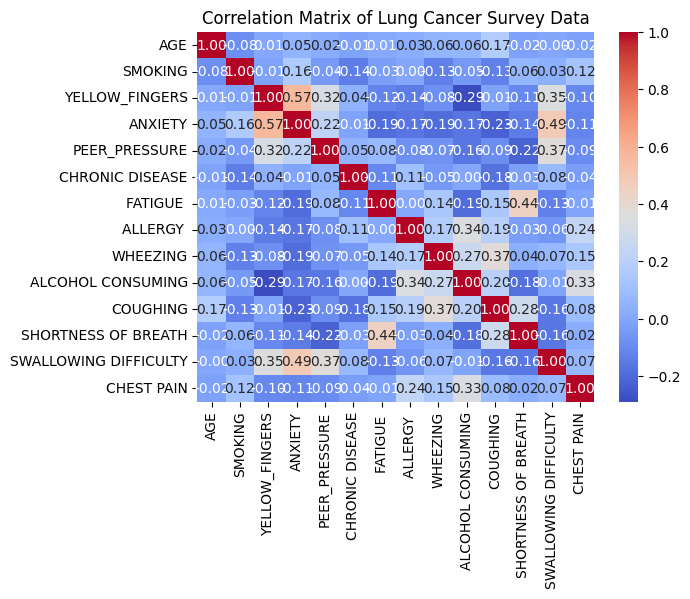

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Lung Cancer Survey Data')
plt.show()
